In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.python.ops import math_ops
from ESN import EchoStateRNNCell
import matplotlib.pyplot as plt
from time import time

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print("MNIST shape", X_train.shape, X_test.shape)

if False:
    # debug only
    X_train = X_train[:10000]
    y_train = y_train[:10000]

# takes only current needed GPU memory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# random numbers
# random_seed = 1
# rng = np.random.RandomState(random_seed)

MNIST shape (60000, 28, 28) (10000, 28, 28)


In [74]:
# flatten training shape
(N, Ni, Nj) = X_train.shape
(N_test, _, _) = X_test.shape

MNIST shape (60000, 28, 28) (10000, 28, 28)
5


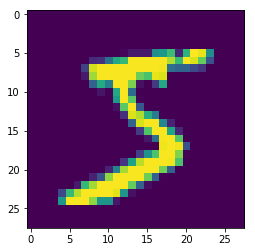

In [75]:

# x_train = x_train.reshape([N, Ni*Nj])
# x_test = x_test.reshape([x_test.shape[0], Ni*Nj])
print("MNIST shape", X_train.shape, X_test.shape)

plt.imshow(X_train[0].reshape([Ni,Nj]))
print(y_train[0])

We define a simple simulation with a single batch. A timeseries of 'stime' timesteps is run. The input is a inpulse 
given in the first timestep consisting of a gaussian noise given to each unit.

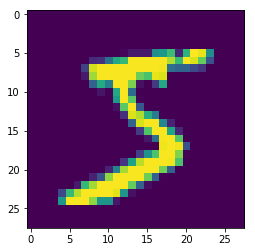

In [79]:
# Global variables

# num_units = 20


# hyperparameters
n_neurons = 100
learning_rate_ = 1e-3
batch_size = 128
n_epochs = 30

# parameters
n_steps = 28 # 28 rows aka Ni
n_inputs = 28 # 28 cols aka Nj
n_outputs = 10 # 10 classes


rnn_inputs = np.zeros((batch_size, n_steps, n_inputs), dtype="float32")
rnn_inputs[:,:,:] = X_train[(0),:,:]
# rnn_inputs[0, :, 0] = np.sin(np.linspace(0,18*np.pi, stime)) + \
#                       np.sin(np.linspace(0,5.3*np.pi, stime)) + \
#                       np.sin(np.linspace(0,2.1*np.pi, stime)) 

plt.imshow(rnn_inputs[0,:,:])
plt.show()
# plt.imshow(rnn_inputs[1,:,:])
# plt.show()

activation = lambda x: math_ops.tanh(x)


Implementing a static graph without tensorflow API:

In [80]:


tf.reset_default_graph()
static_graph = tf.Graph()
with static_graph.as_default() as g:
    
    
    inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
    init_state = tf.placeholder(tf.float32, [None, n_neurons])
    
    y = tf.placeholder(tf.int32, [None])
    
    rng = np.random.RandomState(random_seed)

    # Init the ESN cell
    rand_input = np.random.rand(1, n_neurons)
    rnn_batch_init_state = np.broadcast_to(rand_input, (batch_size, n_neurons))
    rnn_test_init_state = np.broadcast_to(rand_input, (N_test, n_neurons))
    rnn_train_init_state = np.broadcast_to(rand_input, (N, n_neurons))
    cell = EchoStateRNNCell(num_units=n_neurons, 
                            num_inputs=n_inputs,
                            activation=activation, 
                            decay=0.01, 
                            epsilon=1e-10,
                            alpha=0.0100,
                            rng=rng)
    
    
    
    
    
    # Build the graph
    states = []
    state = init_state
    for t in range(n_steps):
        prev_state = state
        
        # LEARNING ERROR IS HERE
        # out, state = cell(inputs=inputs[0,t:(t+1),:], state=prev_state)
        #                               ^ error in batching
        out, state = cell(inputs= tf.reshape(inputs[:,t:(t+1),:], [-1, n_inputs]), state=prev_state)
#         print("out.shape", out.shape)
        print("state.shape", state.shape)
        states.append(out)
    
    outputs = tf.convert_to_tensor(states)
    print("outputs1.shape", outputs.shape)
    outputs = tf.transpose(outputs, [1,0,2])
    print("outputs2.shape", outputs.shape)
    outputs = tf.reshape(outputs, [-1, n_steps * n_neurons]) #tf.reshape(tf.convert_to_tensor(states), [-1, n_steps * n_neurons])
    print("outputs3.shape", outputs.shape)
    
    logits = tf.layers.dense(outputs, n_outputs)
    
    # RNN example
#     cell = tf.nn.rnn_cell.BasicRNNCell(num_units= n_neurons)
#     output, state = tf.nn.dynamic_rnn(cell, inputs, dtype= tf.float32)
    
#     print(state.shape)
    
#     logits = tf.layers.dense(state, n_outputs)

    
    
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate_).minimize(loss)
    prediction = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    
    
    # initialize the variables
    init = tf.global_variables_initializer()
    
    
# tf.matmul
# Input shape(1, 28)
# W: (28, 28) ()
# state.shape (?, 28)
# outputs.shape (?, 784)

# K.batch_mul
# (1, 28)
# (28, 28) ()
# state.shape (28, 28)
# outputs.shape (28, 784)

Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (28, 100) sw: ()
state.shape (?, 100)
Input shape (?, 28)
W: (

Implementing a dynamic graph using tensorflow API

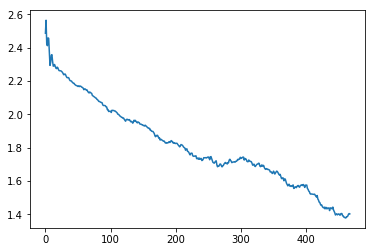

Epoch 1/30:
	Train Loss: 1.6246867180, Train Acc: 0.505


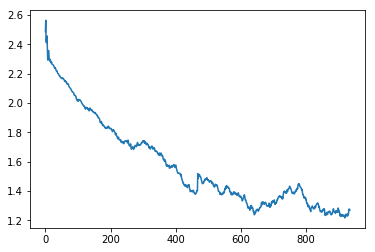

Epoch 2/30:
	Train Loss: 1.3731659651, Train Acc: 0.624


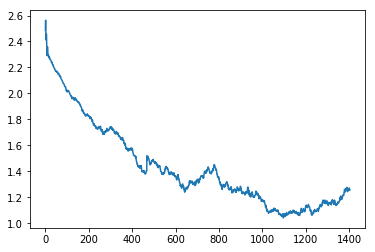

Epoch 3/30:
	Train Loss: 1.1612738371, Train Acc: 0.717


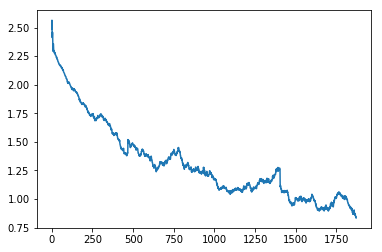

Epoch 4/30:
	Train Loss: 1.0467405319, Train Acc: 0.710


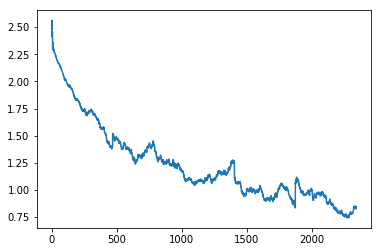

Epoch 5/30:
	Train Loss: 0.9357712269, Train Acc: 0.768


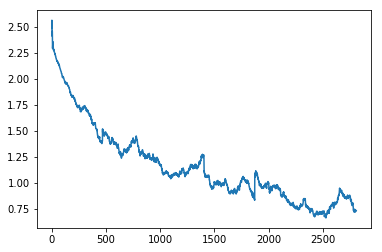

Epoch 6/30:
	Train Loss: 0.8499120474, Train Acc: 0.790


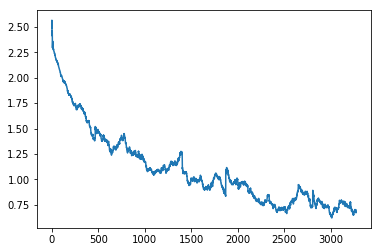

Epoch 7/30:
	Train Loss: 0.8223363161, Train Acc: 0.784


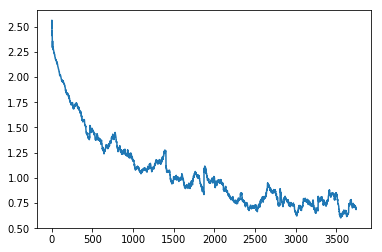

Epoch 8/30:
	Train Loss: 0.7700497508, Train Acc: 0.803


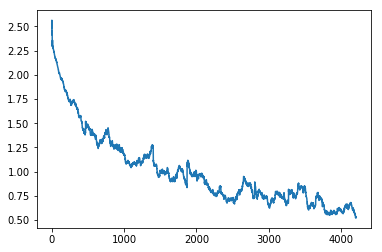

Epoch 9/30:
	Train Loss: 0.7268784046, Train Acc: 0.804


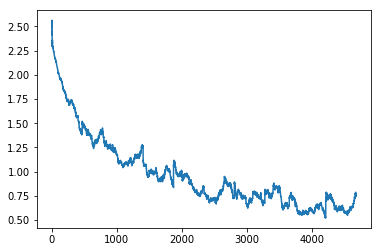

Epoch 10/30:
	Train Loss: 0.6962974668, Train Acc: 0.805


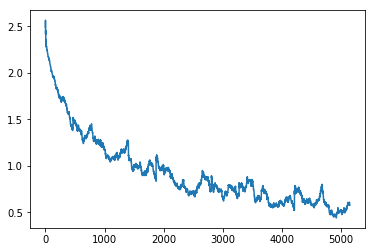

Epoch 11/30:
	Train Loss: 0.6897397637, Train Acc: 0.810


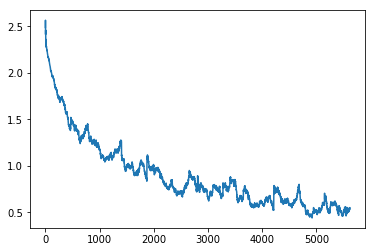

Epoch 12/30:
	Train Loss: 0.7350795865, Train Acc: 0.789


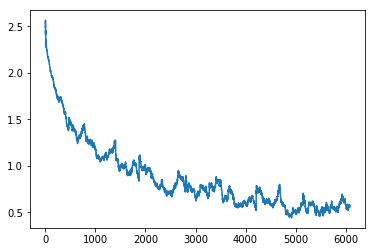

Epoch 13/30:
	Train Loss: 0.6258777976, Train Acc: 0.835


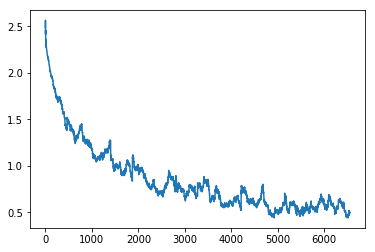

Epoch 14/30:
	Train Loss: 0.6346527934, Train Acc: 0.814


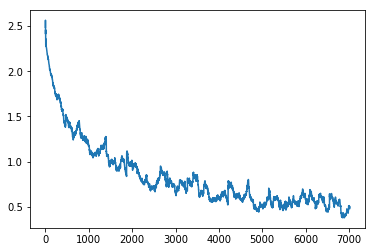

Epoch 15/30:
	Train Loss: 0.5982515812, Train Acc: 0.811


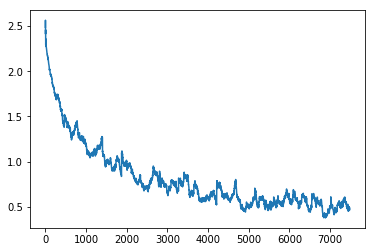

Epoch 16/30:
	Train Loss: 0.5895192027, Train Acc: 0.817


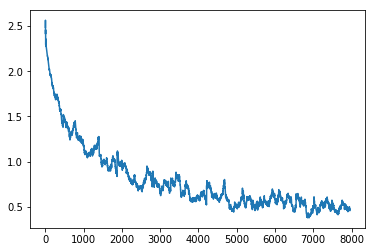

Epoch 17/30:
	Train Loss: 0.5593611002, Train Acc: 0.849


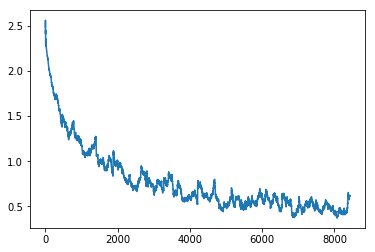

Epoch 18/30:
	Train Loss: 0.5911447406, Train Acc: 0.826


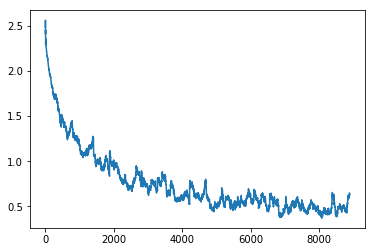

Epoch 19/30:
	Train Loss: 0.5573669672, Train Acc: 0.851


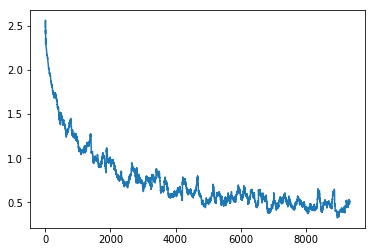

Epoch 20/30:
	Train Loss: 0.5683905482, Train Acc: 0.838


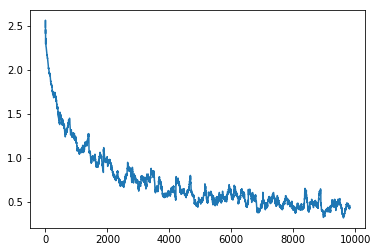

Epoch 21/30:
	Train Loss: 0.5283580422, Train Acc: 0.844


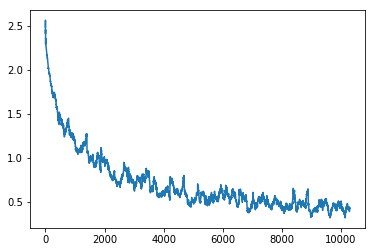

Epoch 22/30:
	Train Loss: 0.5766922235, Train Acc: 0.831


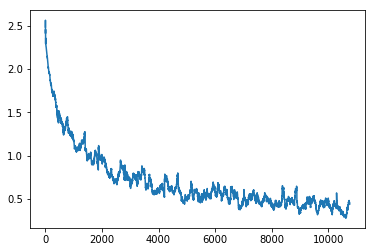

Epoch 23/30:
	Train Loss: 0.5175251365, Train Acc: 0.858


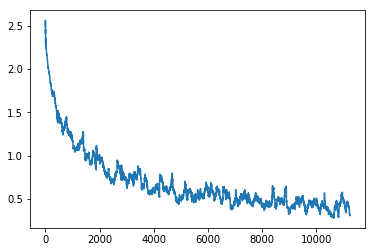

Epoch 24/30:
	Train Loss: 0.4886302352, Train Acc: 0.870


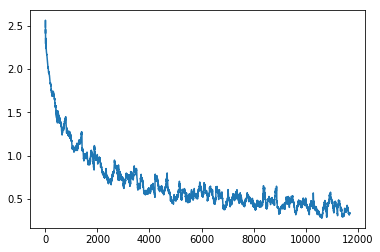

Epoch 25/30:
	Train Loss: 0.4718733728, Train Acc: 0.866


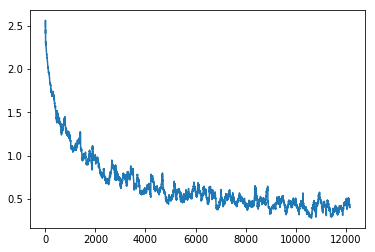

Epoch 26/30:
	Train Loss: 0.5142195821, Train Acc: 0.843


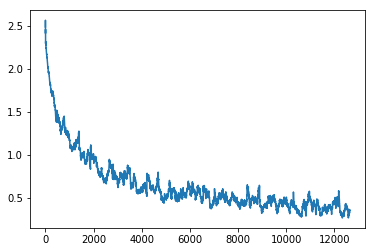

Epoch 27/30:
	Train Loss: 0.4842022359, Train Acc: 0.865


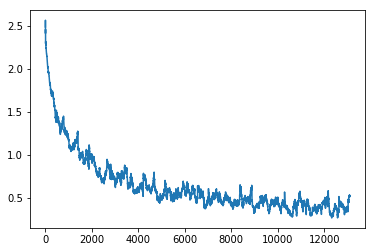

Epoch 28/30:
	Train Loss: 0.4680503011, Train Acc: 0.870


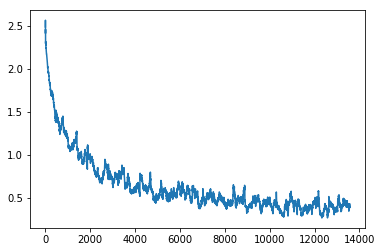

Epoch 29/30:
	Train Loss: 0.4711258709, Train Acc: 0.870


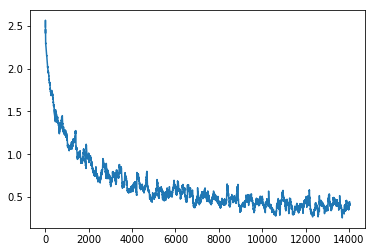

Epoch 30/30:
	Train Loss: 0.4903070629, Train Acc: 0.846
	Test Loss: 0.4654673934, Test Acc: 0.858


In [81]:
losses = []
# train the model
with tf.Session(graph=static_graph) as sess:
    sess.run(init)
    n_batches = N // batch_size
#     print(n_batches)
    for epoch in range(n_epochs):
        permutation = np.random.permutation(N)
#         print(permutation[0:1])
        for i, batch in enumerate(range(n_batches)):
            X_batch, y_batch = X_train[permutation[i:i+batch_size], :,:], y_train[permutation[i:i+batch_size]]
#             print(X_batch.shape, y_batch.shape)
#             print(X_batch.shape, y_batch.shape)
#             X_batch = X_batch.reshape([-1, n_steps, n_inputs])
            _, loss_train, acc_train = sess.run([optimizer, loss, accuracy], 
                                                feed_dict={inputs: X_batch, y: y_batch, 
                                                           init_state: rnn_batch_init_state})
            losses.append(loss_train)
        
        loss_train, acc_train = sess.run([loss, accuracy], feed_dict={inputs: X_train[:1000], y: y_train[:1000], 
                                                                      init_state: rnn_train_init_state[:1000]})
        plt.plot(range(len(losses)), losses)
        plt.show()
        print('Epoch {}/{}:\n\tTrain Loss: {:.10f}, Train Acc: {:.3f}'.format(
            epoch + 1, n_epochs, loss_train, acc_train))
        
    loss_test, acc_test = sess.run(
        [loss, accuracy], feed_dict={inputs: X_test, y: y_test, init_state: rnn_test_init_state})
    print('\tTest Loss: {:.10f}, Test Acc: {:.3f}'.format(loss_test, acc_test))
    

In [35]:
print(y_train[:5000])

[5 0 4 ... 2 1 2]
